# 스크래핑 입문
## requests

In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [5]:
# 네이버 연결 확인
import requests

res = requests.get("https://naver.com")
print("status_code :", res.status_code)    # 정상 : 200

status_code : 200


In [7]:
# requests.codes.ok : 상수값 200과 같다
import requests

res = requests.get("https://yyy.tistory.com")

if res.status_code == requests.codes.ok:    # requests.codes.ok는 상수값 200과 같다
    print("정상")
else:
    print("오류 :", res.status_code)

오류 : 404


정상입니다
162230

<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" c
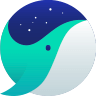
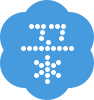

In [11]:
# res.raise_for_status() : 참이 아닐경우 종료하는 함수
import requests

res = requests.get("https://naver.com")

res.raise_for_status()
print("정상입니다")
print(len(res.text))
print(res.text)

In [12]:
# status code가 4로 시작하면 client Error다. ex) 404
# 5로 시작하면 Server Error ex)500

# 크롤러 만들기
## urllib 패키지

b'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2
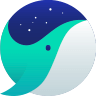
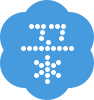

In [13]:
# 네이버 첫 페이지 받아오기(urlopen)
from urllib.request import urlopen

url = "https://www.naver.com"
html = urlopen(url)
print(html.read())

In [14]:
# Error 처리
from urllib.request import urlopen, HTTPError

try:
    html = urlopen("https://www.google.com/kim.html")
except HTTPError as e:    # 주소는 맞지만 해당 문서가 없어서 에러
    print(e)
else:
    print("성공")

HTTP Error 404: Not Found


In [15]:
# Error 처리
from urllib.request import urlopen, HTTPError, URLError

try:
    html = urlopen("https://www.dddsdf.com/kim.html")
except HTTPError as e:
    print(e)
except URLError as e:    # 주소 자체가 잘못되서 에러
    print("The server coult not be found!")
else:
    print("성공")

The server coult not be found!


## BeautifulSoup 라이브러리

In [16]:
pip install bs4

  Using cached bs4-0.0.1-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [17]:
# 파싱
import bs4

html_str = "<html><div>hello</div></html>"
bs_obj = bs4.BeautifulSoup(html_str, "html.parser")

print(type(bs_obj))
print(bs_obj)
print(bs_obj.find("div"))

<class 'bs4.BeautifulSoup'>
<html><div>hello</div></html>
<div>hello</div>


In [20]:
# .find()
import bs4

html_str = """
<html>
    <body>
        <ul>
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
    </body>
</html>
"""
bs_obj = bs4.BeautifulSoup(html_str, "html.parser")
ul = bs_obj.find("ul")
print(ul)

# hello 뽑아내기
print()
li = ul.find('li')
print(li)

# hello 글자만 뽑아내기
print()
print(li.text)

<ul>
<li>hello</li>
<li>bye</li>
<li>welcome</li>
</ul>

<li>hello</li>

hello


In [24]:
# find로는 중간 값을 뽑아내지 못한다
# findAll() 사용하기
import bs4

html_str = """
<html>
    <body>
        <ul>
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
    </body>
</html>
"""
bs_obj = bs4.BeautifulSoup(html_str, "html.parser")
ul = bs_obj.find("ul")
lis = ul.findAll("li")
print(lis)
print(lis[1].text)    # bye 글자만 출력하기

[<li>hello</li>, <li>bye</li>, <li>welcome</li>]
bye


In [27]:
# 데이터 뽑을 때 class 속성 이용하기
import bs4

html_str = """
<html>
    <body>
        <ul class = "greet">
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
        <ul class = "reply">
            <li>ok</li>
            <li>no</li>
            <li>sure</li>
        </ul>
    </body>
</html>
"""

bs_obj = bs4.BeautifulSoup(html_str, "html.parser")
ul = bs_obj.find("ul")
print(ul)
print()
ul = bs_obj.find("ul", {"class":"reply"})
print(ul)

<ul class="greet">
<li>hello</li>
<li>bye</li>
<li>welcome</li>
</ul>

<ul class="reply">
<li>ok</li>
<li>no</li>
<li>sure</li>
</ul>


In [29]:
# 속성값 뽑아내기
import bs4 

html_str = """
<html>
    <body>
        <ul class = "ko">
            <li>
                <a href = "http://www.naver.com/">네이버</a>
            </li>
            <li>
                <a href = "http://www.daum.com/">다음</a>
            </li>
        </ul>
        <ul class = "sns">
            <li>
                <a href = "http://www.google.com/">구글</a>
            </li>
            <li>
                <a href = "http://www.facebook.com/">페이스북</a>
            </li>
        </ul>
    </body>
</html>
"""

bs_obj = bs4.BeautifulSoup(html_str, "html.parser")
atag = bs_obj.find("a")
print(atag)
print(atag['href'])    # a href의 value값이 나온다

<a href="http://www.naver.com/">네이버</a>
http://www.naver.com/


In [ ]:
# 이미지 다운로드